In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## IMPORTING THE DATASET

In [6]:
data1 = pd.read_csv("/content/Part1(1).csv", index_col=0)
data2 = pd.read_csv("/content/Part2.csv_Part_2.csv")


data1['timestamp'] = pd.to_datetime(data1['timestamp']) # CONVERTING THE COLUMN TO DATE TIME
data1 = data1.sort_values('timestamp') # SORTING THE VALUES IN ASCENDING ORDER
data1 = data1.iloc[4:,:]
data1.reset_index(inplace = True, drop = True)

data1

,timestamp,soc,voltage,current
0,2021-11-09 07:07:33,93,57.1,2.9
1,2021-11-09 07:07:33,93,57.1,0.0
2,2021-11-09 07:07:33,93,56.7,12.8
3,2021-11-09 07:09:44,93,57.1,0.0
4,2021-11-09 07:09:44,93,57.1,0.0
...,...,...,...,...
81131,2022-01-31 17:08:29,72,54.2,0.0
81132,2022-01-31 17:08:29,72,54.2,0.0
81133,2022-01-31 17:10:40,72,54.2,0.0
81134,2022-01-31 17:10:40,72,54.2,0.0


## **I. DATA EXPLORATION AND PREPROCESSING**
### INFO()

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81136 entries, 0 to 81135
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  81136 non-null  datetime64[ns]
 1   soc        81136 non-null  int64         
 2   voltage    81136 non-null  float64       
 3   current    81136 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.5 MB


### CHECKING NULL VALUES

In [8]:
print("DATA 1")
print(data1.isna().sum())
print("\n")
print("DATA 2")
print(data2.isna().sum())

# NO MISSING VALUES

DATA 1
timestamp    0
soc          0
voltage      0
current      0
dtype: int64


DATA 2
Cycle_Index                0
Discharge_Capacity (Ah)    0
dtype: int64


### VARIATION WRT TIME

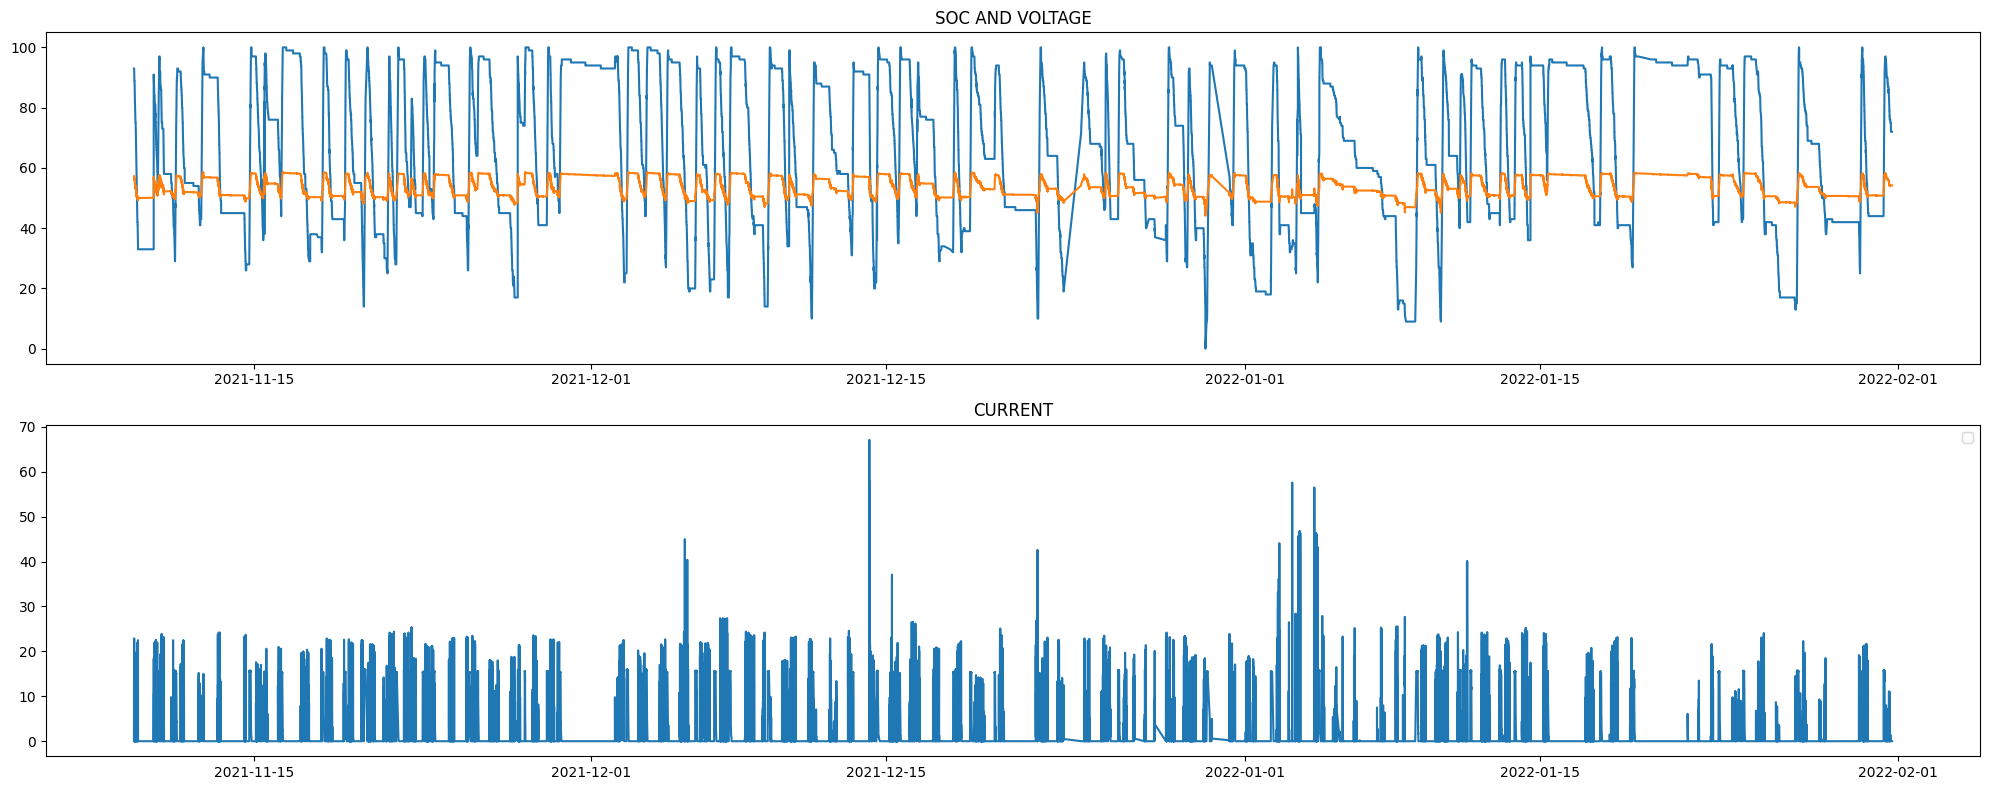

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))  # 1x3 grid

axes[0].plot(data1["timestamp"], data1["soc"], label = "SOC")
axes[0].plot(data1["timestamp"], data1["voltage"], label = "VOLTAGE")
axes[0].set_title('SOC AND VOLTAGE')
plt.legend()

axes[1].plot(data1["timestamp"], data1["current"])
axes[1].set_title('CURRENT')

plt.tight_layout()
plt.show();

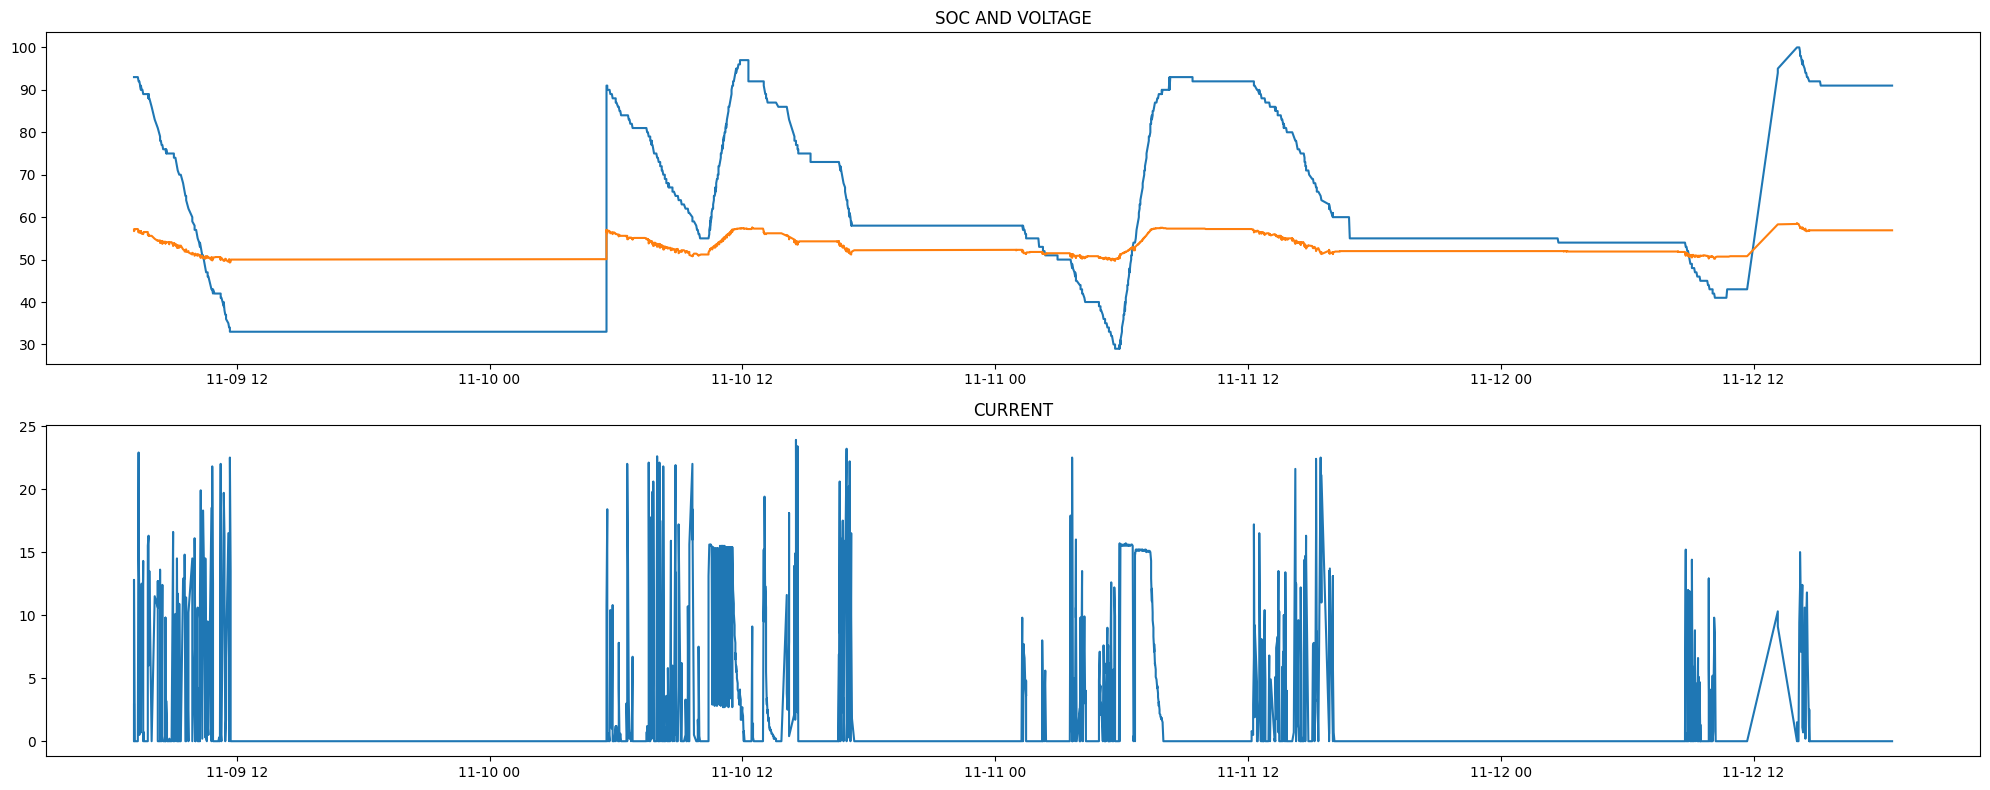

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8))  # 1x3 grid

axes[0].plot(data1["timestamp"][:3000], data1["soc"][:3000])
axes[0].plot(data1["timestamp"][:3000], data1["voltage"][:3000])
axes[0].set_title('SOC AND VOLTAGE')

axes[1].plot(data1["timestamp"][:3000], data1["current"][:3000])
axes[1].set_title('CURRENT')

plt.tight_layout()
plt.show();

### DISTRIBUTION (KDE) OF `SOC`, `VOLATAGE` AND `CURRENT`

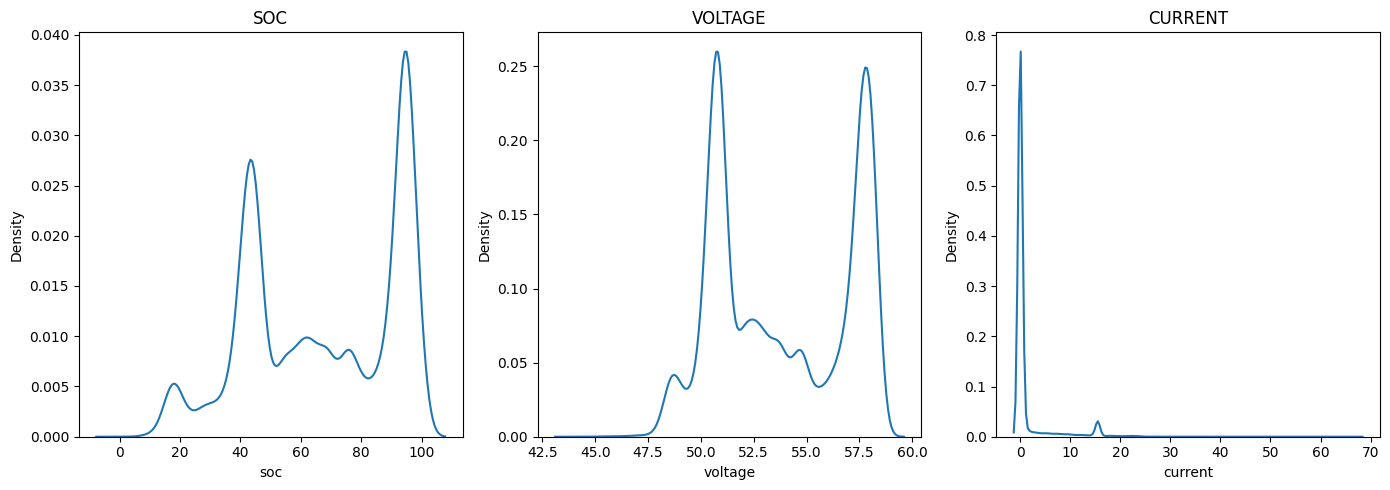

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  # 1x3 grid

sns.kdeplot(data=data1["soc"], ax=axes[0])
axes[0].set_title('SOC')

sns.kdeplot(data=data1["voltage"], ax=axes[1])
axes[1].set_title('VOLTAGE')

sns.kdeplot(data=data1["current"], ax=axes[2])
axes[2].set_title('CURRENT')

plt.tight_layout()
plt.show();

### BOXPLOTS - TO SEE OUTLIERS

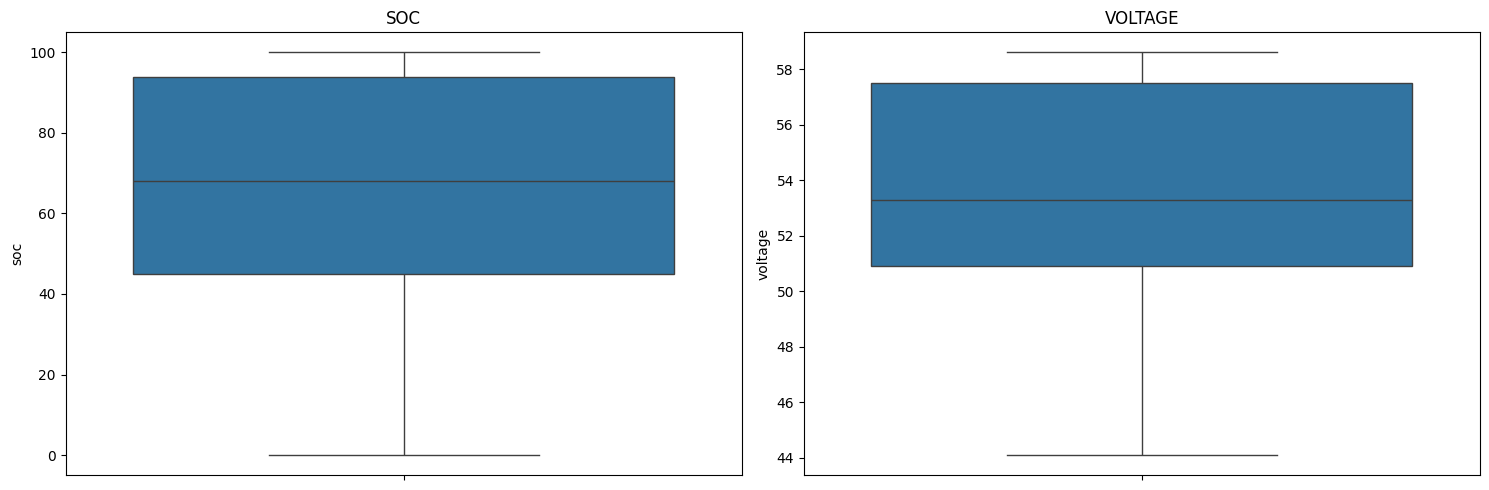

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1x3 grid

# Plot boxplots for each dataset in each subplot
sns.boxplot(data=data1["soc"], ax=axes[0])
axes[0].set_title('SOC')

sns.boxplot(data=data1["voltage"], ax=axes[1])
axes[1].set_title('VOLTAGE')

plt.tight_layout()
plt.show();

# NO OUTLIERS

## DATA 2

In [13]:
data2

,Cycle_Index,Discharge_Capacity (Ah)
0,3,1.050
1,4,2.082
2,5,1.041
3,6,1.041
4,7,1.041
...,...,...
3647,4054,0.798
3648,4055,0.797
3649,4056,0.797
3650,4057,0.797


In [14]:
data2.describe()

,Cycle_Index,Discharge_Capacity (Ah)
count,3652.000000,3652.000000
mean,2022.990416,0.931018
std,1172.164856,0.097961
min,3.000000,0.000000
25%,997.750000,0.873750
50%,2022.500000,0.938000
75%,3034.250000,0.995000
max,4058.000000,2.082000


## OUTLIER REMOVAL

In [15]:
# Identifying outliers using the interquartile range (IQR)
Q1 = data2['Discharge_Capacity (Ah)'].quantile(0.25)
Q3 = data2['Discharge_Capacity (Ah)'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data2_filtered = data2[(data2['Discharge_Capacity (Ah)'] >= lower_bound) & (data2['Discharge_Capacity (Ah)'] <= upper_bound)]

# Display the shape of the original and filtered DataFrames to compare
print("Original DataFrame shape:", data2.shape)
print("Filtered DataFrame shape:", data2_filtered.shape)

Original DataFrame shape: (3652, 2)
Filtered DataFrame shape: (3633, 2)


In [16]:
# CALCULATING SOH WRT CAPACITY
data2_filtered["soh"] = data2_filtered["Discharge_Capacity (Ah)"]/data2_filtered["Discharge_Capacity (Ah)"].max()
data2_filtered

,Cycle_Index,Discharge_Capacity (Ah),soh
0,3,1.050,1.000000
2,5,1.041,0.991429
3,6,1.041,0.991429
4,7,1.041,0.991429
5,8,1.041,0.991429
...,...,...,...
3647,4054,0.798,0.760000
3648,4055,0.797,0.759048
3649,4056,0.797,0.759048
3650,4057,0.797,0.759048


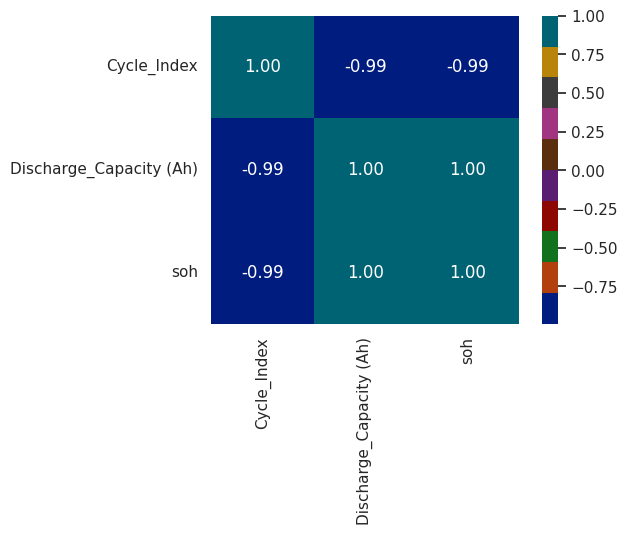

In [17]:
plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
cmap = sns.color_palette("dark", as_cmap=True)

sns.heatmap(data = data2_filtered.corr(), annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True)
plt.show()

# HIGH CORELATION SEEN

## **I. MODELING**

In [18]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data2_filtered[['Cycle_Index']]
y = data2_filtered['soh']

# TRAIN TEST SPLIT
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

### 1. LINEAR REGRESSION

In [19]:
def predict_soh(data):
    X = data[['Cycle_Index']]
    y = data['soh']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    return y_pred, model
pred_soh, model = predict_soh(data2_filtered)
pred_soh

array([0.99658826, 0.99647913, 0.99642457, ..., 0.77543474, 0.77538018,
       0.77532561])

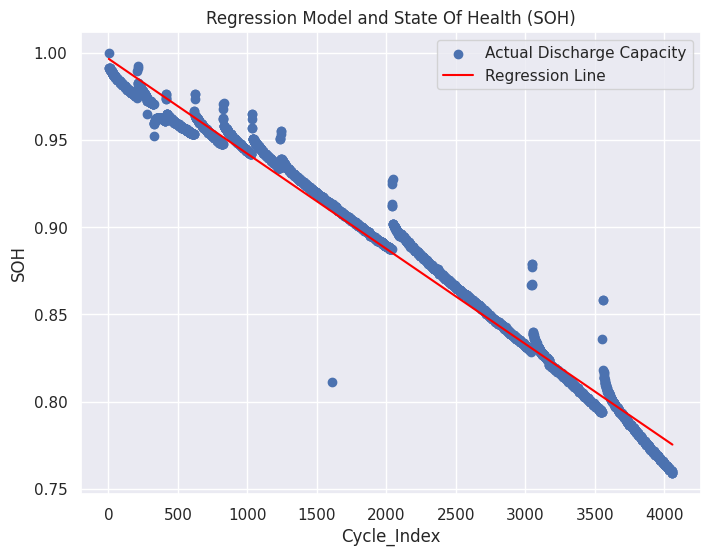

In [20]:
# Visualize the regression and SOH
plt.figure(figsize=(8, 6))

# Scatter plot of Cycle_Index vs Discharge_Capacity
plt.scatter(X, y, label='Actual Discharge Capacity')
# Regression line
plt.plot(X, pred_soh, color='red', label='Regression Line')

plt.xlabel('Cycle_Index')
plt.ylabel('SOH')
plt.title('Regression Model and State Of Health (SOH)')
plt.legend()
plt.show()

### 2. RANDOM FOREST REGRESSOR

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)
print(100 * rf.score(X, y))
ypred = rf.predict(X)
mse = mean_squared_error(y, ypred)
print("RMSE: ", math.sqrt(mse))

99.98164945252189
RMSE:  0.0008721295369748353


## **II. RUL (REMAINING USEFUL LIFE) OF BATTERY AT 500, 1000, 2000, 3000, 3500 CYCLES**

In [22]:
inputs = pd.DataFrame({"Cycle_Index":[500, 1000, 2000, 3000, 3500]})
ypred = model.predict(inputs)
inputs["SOH"] = ypred
ypred

array([0.96946927, 0.94218657, 0.88762118, 0.83305579, 0.8057731 ])

In [23]:
cycle_count = 0
while True:
    ypred = model.predict([[cycle_count]])
    if ypred < 0.8: # FINDING OUT THE CYCLE COUNT AT WHICH SOH COMES BELOW 0.8
        break
    else:
        cycle_count += 1
print("CYCLE COUNT WHEN THE BATTERY REACHES END IS: ", cycle_count)

CYCLE COUNT WHEN THE BATTERY REACHES END IS:  3606


In [24]:
# HENCE RUL (REMAINING USEFUL LIFE) IN CYCLES
inputs["RUL"] = 3606 - inputs["Cycle_Index"]
inputs

,Cycle_Index,SOH,RUL
0,500,0.969469,3106
1,1000,0.942187,2606
2,2000,0.887621,1606
3,3000,0.833056,606
4,3500,0.805773,106
